# AWS EC2 instance types benchmarking for SE++

## Different instances family

### Instance types
| Type         | vCPU | Memory (GiB) | Storage (GB) | Price ($/h) | Cost ($/h/vCPU) |
| :----------: | :--: | :----------: | :----------: | :---------: | :-------------: |
| c5d.large    | 2    | 4            | 50           | 0.096       | 0.0480          |
| c7i.large    | 2    | 4            | -            | 0.0892      | 0.0445          |
| c6a.large    | 2    | 4            | -            | 0.0765      | 0.0382          |
| c6id.large   | 2    | 4            | 118          | 0.1008      | 0.0504          |
| c5d.4xlarge  | 16   | 32           | 400          | 0.768       | 0.0480          |
| c7i.4xlarge  | 16   | 32           | -            | 0.714       | 0.0445          |
| c6a.4xlarge  | 16   | 32           | -            | 0.612       | 0.0382          |
| c6a.12xlarge | 48   | 96           | -            | 1.836       | 0.0382          |
| c7i.48xlarge | 192  | 384          | -            | 8.568       | 0.0445          |
| c6a.48xlarge | 192  | 384          | -            | 7.344       | 0.0382          |

### Benchmark fields
| Size         | FOV       | Field | # Sources |
| :----------: | :-------: | :---: | :-------: |
| 0.25 arcmin² | 0.5'x0.5' | GDS   | 245       |
| 4.0 arcmin²  | 2.0'x2.0' | GDS   | 3609      |

### Results
| Instance     | 0.25 arcmin² | 4.0 arcmin² |
| :----------: | :----------: | :---------: |
| c5d.large    | 01h06m39s    | -           |
| c7i.large    | 00h47m51s    | -           |
| c6a.large    | 00h42m14s    | -           |
| c6id.large   | 00h56m11s    | -           |
| c7i.4xlarge  | -            | 02h15m00s $^{\ast}$ |
| c6a.4xlarge  | 00h13m39s    | 02h35m30s   |
| c6a.12xlarge | -            | 27% (~4xlarge) $^{\dagger}$ |
| c6a.48xlarge | -            | 6% (~4xlarge) $^{\dagger}$ |

*$^{\ast}$ Didn't finish completely (>99%)*

*$^{\dagger}$ Low CPU utilization, test not conducted until the end*

## Multi-threading and hyper-threading

WARNING : All values with `# Bands = 16` may be inconclusive because some images were completely blank and led to SE++ making no model fitting.

| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :----------: |
| c6a.8xlarge | 32 | 64 | 0.25 arcmin² | 450 | 2 | 00:07:40 | 18.4% | 00:30:05 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 451 | 2 | 00:07:37 | 16.9% | 00:29:21| Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 451 | 2 | 00:07:31 | 15.5% | 00:29:06 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 2 | 00:06:44 | 16.7% | 00:27:36 | Y |
| c6a.8xlarge | 32 | 4 | 0.25 arcmin² | 451 | 2 | 00:07:57 | 10.8% | 00:27:16 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 2 | 00:07:07 | 15.8% | 00:27:57 | N |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 4 | 00:11:11 | 22.2% | 00:55:20 | N |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 4 | 00:11:37 | 19.0% | 00:58:37 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 450 | 4 | 00:11:26 | 23.5% | 00:56:24 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 450 | 8 | 00:24:51 | 25.0% | 02:08:44 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 8 | 00:20:24 | 46.6% | 02:09:41 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 450 | 8 | 00:21:09 | 49.3% | 02:21:19 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 16 | 00:08:43 | 9.1% | 00:19:34 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 450 | 16 | 00:08:22 | 8.9% | 00:19:15 | Y |
| c6a.8xlarge | 32 | 64 | 0.25 arcmin² | 450 | 16 | 00:09:00 | 8.4% | 00:20:08 | Y |
| c6a.4xlarge | 16 | 2 | 0.25 arcmin² | 450 | 16 | 00:09:42 | 12.1% | 00:17:06 | Y |
| c6a.4xlarge | 16 | 4 | 0.25 arcmin² | 451 | 16 | 00:07:23 | 17.9% | 00:17:29 | Y |
| c6a.4xlarge | 16 | 8 | 0.25 arcmin² | 451 | 16 | 00:07:30 | 20.1% | 00:18:12 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcmin² | 451 | 16 | 00:07:52 | 18.9% | 00:19:17 | Y |
| c6a.4xlarge | 16 | 32 | 0.25 arcmin² | 450 | 16 | 00:08:02 | 15.0% | 00:19:10 | Y |
| c6a.4xlarge | 16 | 64 | 0.25 arcmin² | 450 | 16 | 00:08:12 | 10.1% | 00:19:38 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcmin² | 1573 | 16 | 00:29:40 | 25.2% | 01:21:45 | Y |
| c6a.4xlarge | 16 | 8 | 1.0 arcmin² | 1570 | 16 | 00:26:52 | 41.2% | 01:24:43 | Y |
| c6a.4xlarge | 16 | 16 | 1.0 arcmin² | 1570 | 16 | 00:30:20 | 67.0% | 01:32:08 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcmin² | 1572 | 8 | 02:20:40 | 24.8% | 08:42:12 | Y |
| c6a.4xlarge | 16 | 128 | 0.25 arcmin² | 451 | 14 | 00:49:59 | 100% | 05:59:19 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcmin² | 451 | 14 | --:--:-- | 100% | --:--:-- | Y |

#### Stopped before end
| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread | Max MEM | Run % | Expected runtime |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :---------: | :-----: | :---: | :----------: |
| c6a.8xlarge | 32 | 32 | 4.0 arcmin² | 6110 | 16 | 03:04:32 | 98.2% | 53:46:18 | Y | 33% | 54.62% | 05:37:51 |
| c6a.4xlarge | 16 | 8 | 4.0 arcmin² | 6108 | 16 | 01:08:41 | 51.1% | 08:39:08 | Y | 40% | 12.07% | 09:29:02 |
| c6a.4xlarge | 16 | 32 | 4.0 arcmin² | 6108 | 16 | 00:53:33 | 100% | 12:46:12 | Y | 50% | 12.61% | 07:04:39 |
| c6a.4xlarge | 16 | 128 | 4.0 arcmin² | 6112 | 16 | 00:57:41 | 100% | 13:53:10 | Y | 75% | 14.38% | 06:41:08 |
| c6a.4xlarge | 16 | 256 | 4.0 arcmin² | 6112 | 16 | 00:41:29 | 100% | 09:55:35 | Y | 83% | 9.35% | 07:23:40 |
| c6a.4xlarge | 16 | 32 | 4.0 arcmin² | 6098 | 8 | 00:32:24 | 100% | 07:04:53 | Y | 35% | 15.91% | 02:05:02 |
| c6a.8xlarge | 32 | 32 | 4.0 arcmin² | 6109 | 8 | 00:46:33 | 53.3% | 09:35:23 | Y | 23% | 26.65% | 02:54:40 |
| c6a.8xlarge | 32 | 64 | 4.0 arcmin² | 6101 | 16 | 00:41:32 | 100% | 18:07:28 | Y | 28% | 18.96% | 03:39:03 |
| c6a.8xlarge | 32 | 128 | 4.0 arcmin² | 6099 | 16 | 00:43:38 | 100% | 20:03:47 | Y | 36% | 20.53% | 03:32:32 |
| c6a.8xlarge | 32 | 128 | 4.0 arcmin² | 6106 | 16 | 00:48:36 | 49.9% | 11:32:22 | N | 36% | 18.16% | 04:27:37 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6099 | 16 | 00:31:45 | 84.0% | 13:42:00 | Y | 17% | 18.84% | 02:48:31 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6103 | 16 | 00:28:25 | 49.9% | 11:32:22 | N | 16% | 17.58% | 02:41:38 |
| c6a.16xlarge | 64 | 256 | 4.0 arcmin² | 6099 | 16 | 00:27:46 | 49.9% | 11:42:44 | N | 22% | 17.17% | 02:41:43 |
| c6a.16xlarge | 64 | 64 | 4.0 arcmin² | 6110 | 16 | 01:32:58 | 49.9% | 30:49:15 | N | 47% | 42.65% | 03:37:58 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6113 | 4 | 00:26:18 | 14.5% | 03:27:08 | N | 8% | 22.90% | 01:54:50 |
| c6id.8xlarge | 32 | 128 | 16.0 arcmin² | 27524 | 16 | 00:58:48 | 100% | 16:37:07 | Y | 88% | 2.11% | 09:18:00 |
| c6id.16xlarge | 64 | 128 | 16.0 arcmin² | 27524 | 16 | 22:00:00 | 40% | 388:55:26 | Y | 86% | 95.00% | 23:10:00 |

## Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd

plt.rcParams['xtick.labelsize']='large'
plt.rcParams['ytick.labelsize']='large'
plt.rcParams['axes.labelsize']='x-large'
plt.rcParams['legend.fontsize']='large'
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True

In [3]:
def str2data(string, type):
    string = string.strip()
    match type:
        case "p": # Percentage (with % sign)
            return float(string[:-1])/100
        case "i": # Integer
            return int(''.join(c for c in string if c.isdigit()))
        case "f": # Float
            return float(''.join(c for c in string if c.isdigit()))
        case "u": # Unit quantity (space between value and unit)
            return float(string.split(" ")[0])
        case "t": # Time (%H:%M:%S)
            # return datetime.strptime(string, "%H:%M:%S").time()
            return pd.to_timedelta(string).seconds
        case "s": # String
            return string
        case "b": # Boolean
            return string in ["Y","y","True","1"]
    return string

def parse_table(table, types):
    lines = table.split("\n")
    header = [name.strip() for name in lines[0].split("|")[1:-1]]
    data = []
    for line in lines[2:]:
        col = [str2data(pt, types[i]) for i,pt in enumerate(line.split("|")[1:-1])]
        data.append(col)
    df = pd.DataFrame(data, columns=header)
    # for i in range(len(types)):
    #     if types[i]=="t":
    #         df.iloc[:,i] = pd.to_timedelta(df.iloc[:,i])
    return df

In [4]:
def plot_benchmark(data, 
                   thread_count="thread_count",
                   runtime="Runtime", 
                   sources="# Sources", 
                   bands="# Bands", 
                   instance="Instance",  
                   size="Size", 
                   cpu="Max CPU",
                   hyper="Hyper thread"):
    
    fig, ax = plt.subplots(figsize=(8,6))

    color_dict = {'c6a.16xlarge':'lightgreen', 'c6id.16xlarge':'palegreen', 'c6a.8xlarge':'tomato', 'c6id.8xlarge':'salmon', 'c6a.4xlarge':'deepskyblue'}
    colors = [color_dict[i] for i in data[instance]]
    mark_dict = {2:'o', 4:'D', 8:'^', 14:'p', 16:'s'}
    markers = [mark_dict[b] for b in data[bands]]
    edge_dict = {0.25:'b', 1.0:'r', 4.0:'g', 16.0:'tab:purple', 25.0:'c'}
    edges = [edge_dict[s] for s in data[size]]
    fill_dict = {True:'full', False:'left'}
    fill = [fill_dict[h] for h in data[hyper]]
    sizes = 200*data[cpu]

    X = data[thread_count]
    Y = data[runtime]/(data[bands]*data[sources])

    for i in range(len(data)):
        ax.scatter(X[i], Y[i], s=sizes[i], c=colors[i], marker=MarkerStyle(markers[i], fillstyle=fill[i]), edgecolors=edges[i], label="_")

    ax.set_ylabel("Runtime [s/(band.sources]")
    ax.set_xlabel("thread_count")

    # Legend
    for type in color_dict:
        ax.scatter([],[],c=color_dict[type],s=50,marker='o',label=type)
    for band in mark_dict:
        ax.scatter([],[],c='k',s=50,marker=mark_dict[band],label=f"{band} bands")
    for size in edge_dict:
        ax.scatter([],[],c='k',s=50,marker='o',edgecolors=edge_dict[size],label=f"{size} arcmin²")
    for cpu in [0.1, 0.5, 1.0]:
        ax.scatter([],[],c='k',s=200*cpu,marker='o',label=f"{cpu*100.0:.0f}% CPU")
    for h in fill_dict:
        ax.scatter([],[],c='k',s=50,marker=MarkerStyle('o',fillstyle=fill_dict[h]),label="Hyperthreading" if h else "No hyperthreading")

    ax.set_ylim(bottom=0.0)
    # ax.set_yscale('log')
    ax.legend(loc='center left', fontsize='medium', bbox_to_anchor=(1,0.5))

    plt.show()

#### Ended

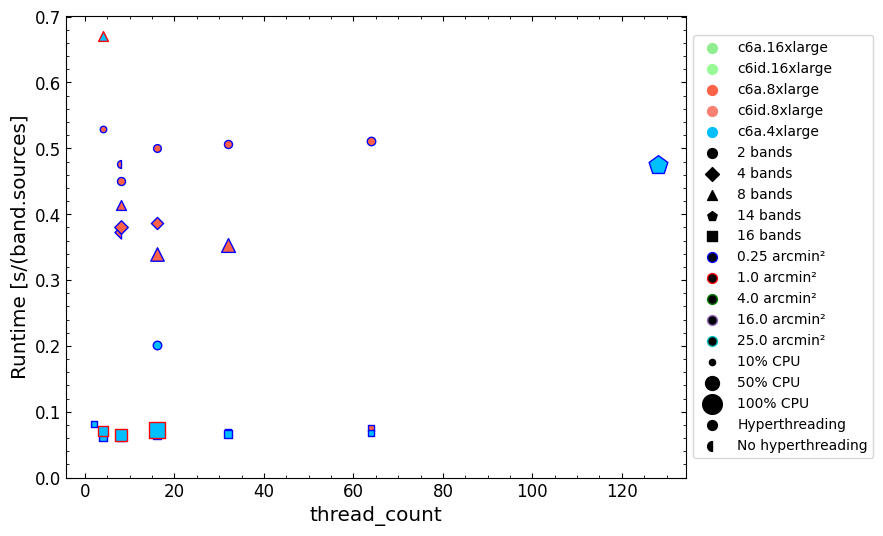

In [7]:
table = """| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :----------: |
| c6a.8xlarge | 32 | 64 | 0.25 arcmin² | 450 | 2 | 00:07:40 | 18.4% | 00:30:05 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 451 | 2 | 00:07:37 | 16.9% | 00:29:21| Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 451 | 2 | 00:07:31 | 15.5% | 00:29:06 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 2 | 00:06:44 | 16.7% | 00:27:36 | Y |
| c6a.8xlarge | 32 | 4 | 0.25 arcmin² | 451 | 2 | 00:07:57 | 10.8% | 00:27:16 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 2 | 00:07:07 | 15.8% | 00:27:57 | N |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 449 | 4 | 00:11:11 | 22.2% | 00:55:20 | N |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 4 | 00:11:37 | 19.0% | 00:58:37 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 450 | 4 | 00:11:26 | 23.5% | 00:56:24 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcmin² | 450 | 8 | 00:24:51 | 25.0% | 02:08:44 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 8 | 00:20:24 | 46.6% | 02:09:41 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 450 | 8 | 00:21:09 | 49.3% | 02:21:19 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcmin² | 450 | 16 | 00:08:43 | 9.1% | 00:19:34 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcmin² | 450 | 16 | 00:08:22 | 8.9% | 00:19:15 | Y |
| c6a.8xlarge | 32 | 64 | 0.25 arcmin² | 450 | 16 | 00:09:00 | 8.4% | 00:20:08 | Y |
| c6a.4xlarge | 16 | 2 | 0.25 arcmin² | 450 | 16 | 00:09:42 | 12.1% | 00:17:06 | Y |
| c6a.4xlarge | 16 | 4 | 0.25 arcmin² | 451 | 16 | 00:07:23 | 17.9% | 00:17:29 | Y |
| c6a.4xlarge | 16 | 8 | 0.25 arcmin² | 451 | 16 | 00:07:30 | 20.1% | 00:18:12 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcmin² | 451 | 16 | 00:07:52 | 18.9% | 00:19:17 | Y |
| c6a.4xlarge | 16 | 32 | 0.25 arcmin² | 450 | 16 | 00:08:02 | 15.0% | 00:19:10 | Y |
| c6a.4xlarge | 16 | 64 | 0.25 arcmin² | 450 | 16 | 00:08:12 | 10.1% | 00:19:38 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcmin² | 1573 | 16 | 00:29:40 | 25.2% | 01:21:45 | Y |
| c6a.4xlarge | 16 | 8 | 1.0 arcmin² | 1570 | 16 | 00:26:52 | 41.2% | 01:24:43 | Y |
| c6a.4xlarge | 16 | 16 | 1.0 arcmin² | 1570 | 16 | 00:30:20 | 67.0% | 01:32:08 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcmin² | 1572 | 8 | 02:20:40 | 24.8% | 08:42:12 | Y |
| c6a.4xlarge | 16 | 128 | 0.25 arcmin² | 451 | 14 | 00:49:59 | 100% | 05:59:19 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcmin² | 450 | 2 | 00:03:01 | 18.8% | 00:05:40 | Y |"""

benchmark = parse_table(table, ["s","i","i","u","i","i","t","p","t","b"])
plot_benchmark(benchmark)

#### Expected runtime

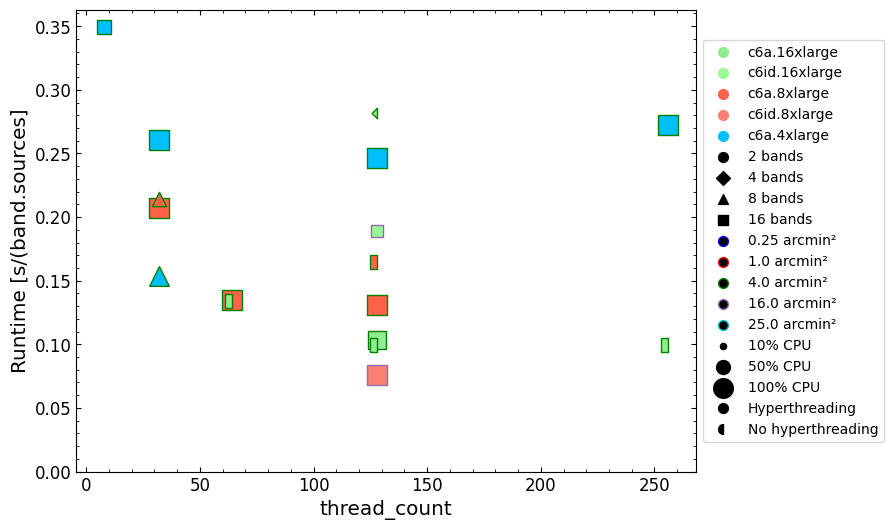

In [8]:
table = """| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread | Max MEM | Run % | Expected runtime |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :---------: | :-----: | :---: | :----------: |
| c6a.8xlarge | 32 | 32 | 4.0 arcmin² | 6110 | 16 | 03:04:32 | 98.2% | 53:46:18 | Y | 33% | 54.62% | 05:37:51 |
| c6a.4xlarge | 16 | 8 | 4.0 arcmin² | 6108 | 16 | 01:08:41 | 51.1% | 08:39:08 | Y | 40% | 12.07% | 09:29:02 |
| c6a.4xlarge | 16 | 32 | 4.0 arcmin² | 6108 | 16 | 00:53:33 | 100% | 12:46:12 | Y | 50% | 12.61% | 07:04:39 |
| c6a.4xlarge | 16 | 128 | 4.0 arcmin² | 6112 | 16 | 00:57:41 | 100% | 13:53:10 | Y | 75% | 14.38% | 06:41:08 |
| c6a.4xlarge | 16 | 256 | 4.0 arcmin² | 6112 | 16 | 00:41:29 | 100% | 09:55:35 | Y | 83% | 9.35% | 07:23:40 |
| c6a.4xlarge | 16 | 32 | 4.0 arcmin² | 6098 | 8 | 00:32:24 | 100% | 07:04:53 | Y | 35% | 15.91% | 02:05:02 |
| c6a.8xlarge | 32 | 32 | 4.0 arcmin² | 6109 | 8 | 00:46:33 | 53.3% | 09:35:23 | Y | 23% | 26.65% | 02:54:40 |
| c6a.8xlarge | 32 | 64 | 4.0 arcmin² | 6101 | 16 | 00:41:32 | 100% | 18:07:28 | Y | 28% | 18.96% | 03:39:03 |
| c6a.8xlarge | 32 | 128 | 4.0 arcmin² | 6099 | 16 | 00:43:38 | 100% | 20:03:47 | Y | 36% | 20.53% | 03:32:32 |
| c6a.8xlarge | 32 | 128 | 4.0 arcmin² | 6106 | 16 | 00:48:36 | 49.9% | 11:32:22 | N | 36% | 18.16% | 04:27:37 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6099 | 16 | 00:31:45 | 84.0% | 13:42:00 | Y | 17% | 18.84% | 02:48:31 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6103 | 16 | 00:28:25 | 49.9% | 11:32:22 | N | 16% | 17.58% | 02:41:38 |
| c6a.16xlarge | 64 | 256 | 4.0 arcmin² | 6099 | 16 | 00:27:46 | 49.9% | 11:42:44 | N | 22% | 17.17% | 02:41:43 |
| c6a.16xlarge | 64 | 64 | 4.0 arcmin² | 6110 | 16 | 01:32:58 | 49.9% | 30:49:15 | N | 47% | 42.65% | 03:37:58 |
| c6a.16xlarge | 64 | 128 | 4.0 arcmin² | 6113 | 4 | 00:26:18 | 14.5% | 03:27:08 | N | 8% | 22.90% | 01:54:50 |
| c6id.8xlarge | 32 | 128 | 16.0 arcmin² | 27524 | 16 | 00:58:48 | 100% | 16:37:07 | Y | 88% | 2.11% | 09:18:00 |
| c6id.16xlarge | 64 | 128 | 16.0 arcmin² | 27524 | 16 | 22:00:00 | 40% | 388:55:26 | Y | 86% | 95.00% | 23:10:00 |"""

benchmark = parse_table(table, ["s","i","i","u","i","i","t","p","t","b","p","p","t"])
plot_benchmark(benchmark, runtime="Expected runtime")